## Heart Disease Prediction
### I will be predicting whether any person is suffering from heart disease

In [1]:
# importing necessary libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\\DataScience\\fwddatasetsforpractice\\heart.csv")

In [3]:
data.shape

(303, 14)

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

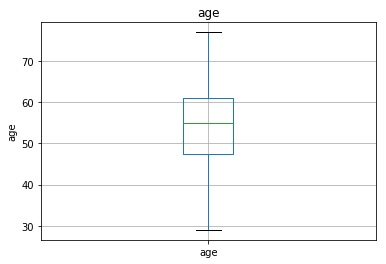

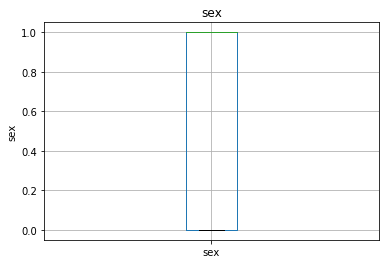

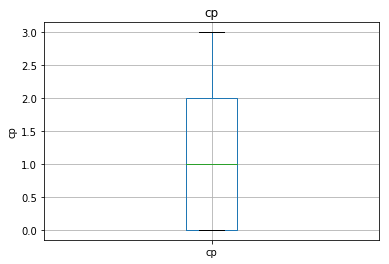

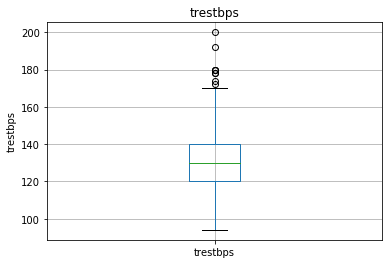

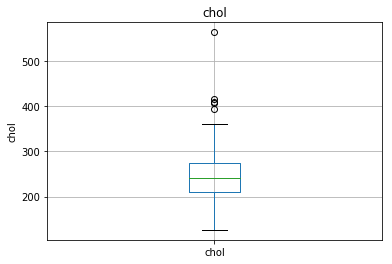

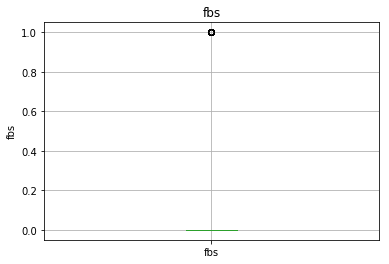

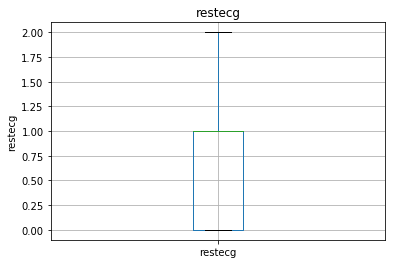

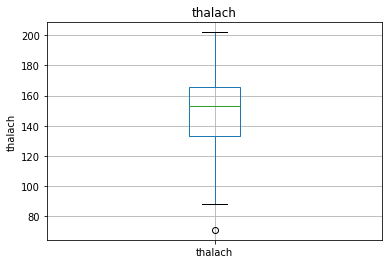

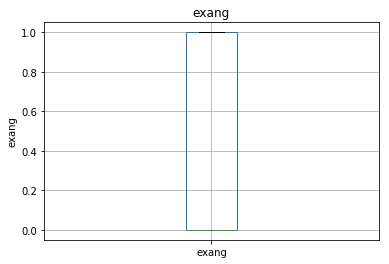

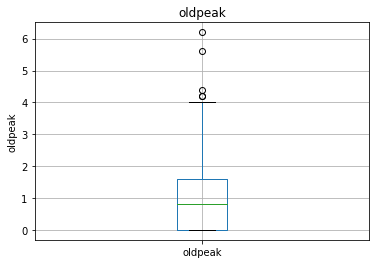

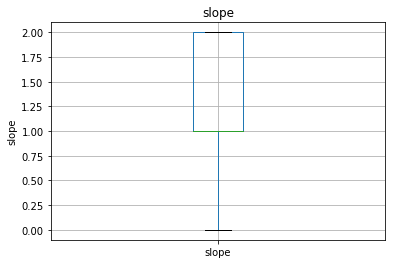

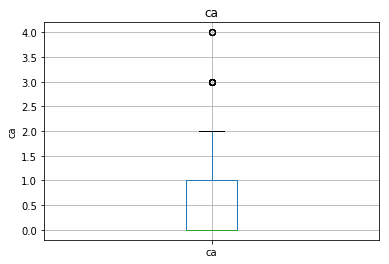

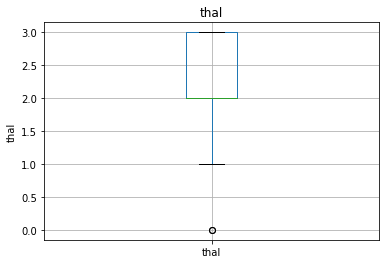

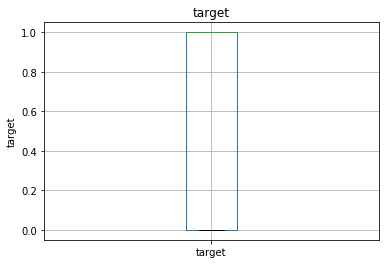

In [18]:
# Finding the outliers 
for feature in data.columns:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

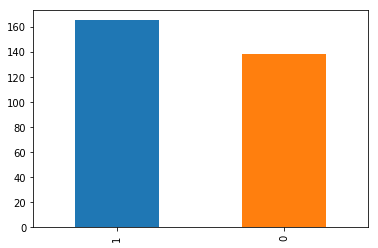

In [24]:
#Checking if dataset is balanced or not
data['target'].value_counts().plot.bar()
plt.show()
#Based on the below chart we could see that person is heart disease is amlost equal to person with person with no heart disease
#which means it is baalanced data set

## Data Processing

#### Converting Categorical variables into dummy variables

In [26]:
df = pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [28]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [29]:
#scaling the variables
from sklearn.preprocessing import scale

In [45]:
df_scaled = scale(data.iloc[:,0:13]) #excluded the o/p variable

C:\Users\Chennakrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [46]:
df_scaled = pd.DataFrame(df_scaled)

In [47]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922


In [48]:
x = df_scaled
y = data['target']
print(x)
print(y)

           0         1         2         3         4         5         6   \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5    0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6    0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7   -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8   -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9    0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   
10  -0.040403  0.681005 -0.938515  0.478391 -0.140381 -0.417635  0.898962   
11  -0.702136 -1.468418  1.002577 -0.092738  0.555337 -0.417635  0.898962   

In [52]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [58]:
x_train.shape

(212, 13)

In [59]:
y_train.shape

(212,)

In [60]:
x_test.shape

(91, 13)

In [61]:
y_test.shape

(91,)

# KNN Classifier

In [66]:
# Implenting KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [113]:
clf = KNeighborsClassifier(n_neighbors=5)

In [114]:
model = clf.fit(x_train,y_train)

In [115]:
# Predicting the outcome
y_pred = model.predict(x_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report

In [117]:
print(confusion_matrix(y_test,y_pred))

[[28 11]
 [ 7 45]]


In [118]:
accuracy = (28+45)/(28+11+7+45)
print(accuracy)

0.8021978021978022


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.80      0.83      0.81        52

   micro avg       0.78      0.78      0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



# Random Forest Classifier

In [82]:
# Building the model using Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier


In [83]:
clf = RandomForestClassifier(n_estimators=20,random_state=0)

In [84]:
model=clf.fit(x_train,y_train)

In [85]:
y_pred = model.predict(x_test)

In [86]:
print(confusion_matrix(y_pred,y_test))

[[27  8]
 [12 44]]


In [87]:
accuracy = (27+44)/(27+8+12+44)

In [88]:
print(accuracy)

0.7802197802197802


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        39
           1       0.79      0.85      0.81        52

   micro avg       0.78      0.78      0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



# Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
clf = DecisionTreeClassifier()

In [108]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
y_pred = clf.predict(x_test)

In [110]:
print(confusion_matrix(y_pred,y_test))

[[26 15]
 [13 37]]


In [111]:
accuracy = (26+37)/(26+15+13+37)
print(accuracy)

0.6923076923076923


In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        39
           1       0.74      0.71      0.73        52

   micro avg       0.69      0.69      0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



### From the above we can conclude that model gave best results with KNN classifier